## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Choosing a dataset

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

In [5]:
X = df['cgpa']
y = df['package']

## Data Preprocessing

In [6]:
# Checking for Nan values in the dataset
df.isnull().values.any()

False

In [7]:
# Checking for duplicate values in the dataset
df.duplicated().sum()

0

## Visualizing the data

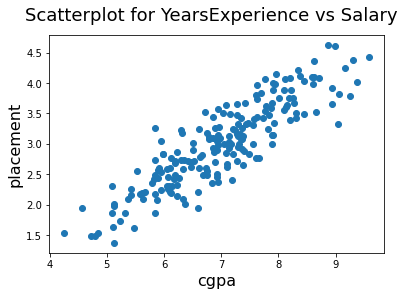

In [8]:
# Scatterplot for YearsExperience vs Salary
fig = plt.figure()
fig.suptitle('Scatterplot for YearsExperience vs Salary', fontsize = 18)
plt.xlabel('cgpa', fontsize = 16)
plt.ylabel('placement', fontsize = 16)

plt.scatter(X, y)
plt.show()

## Creating the Linear Regression Model

In [9]:
class SimpleLinearRegression:
    def __init__(self):
        self.m = None
        self.c = None
    
    def fit(self, X, y):
        X_mean = X.mean()
        y_mean = y.mean()
        num = 0
        den = 0
        
        for i in range(len(X)):
            num += (X[i] - X_mean)*(y[i] - y_mean)
            den += (X[i] - X_mean)**2
        
        self.m = num/den
        self.c = y_mean - (self.m * X_mean)
    
    def predict(self, X):
        return (self.m * X) + self.c

## Splitting the data into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Setting indexes
X_train.index = pd.Index(range(len(X_train)))
X_test.index = pd.Index(range(len(X_test)))
y_train.index = pd.Index(range(len(y_train)))
y_test.index = pd.Index(range(len(y_test)))

## Applying the Linear Regression Model

In [12]:
LR = SimpleLinearRegression()

# Training the model with training data
LR.fit(X_train, y_train)

# Printing slope and intercept of the Linear Regression Model
print("m =", LR.m)
print("c =", LR.c)

m = 0.5763304184634158
c = -1.0296070415163068


## Testing the Model

In [13]:
# Testing the model with test data
y_pred = LR.predict(X_test)

frame = {'X_test':X_test, 'y_test':y_test, 'y_pred':y_pred}
pred_df = pd.DataFrame(frame)
print(pred_df)

    X_test  y_test    y_pred
0     6.94    2.98  2.970126
1     6.22    2.87  2.555168
2     6.33    2.59  2.618565
3     7.69    3.83  3.402374
4     7.09    3.64  3.056576
5     5.88    2.08  2.359216
6     7.89    2.99  3.517640
7     6.07    2.46  2.468719
8     8.94    3.65  4.122787
9     7.37    3.08  3.217948
10    5.48    1.61  2.128684
11    7.33    3.16  3.194895
12    6.19    2.72  2.537878
13    7.08    2.85  3.050812
14    7.63    3.44  3.367794
15    6.75    2.48  2.860623
16    6.35    2.73  2.630091
17    6.68    2.49  2.820280
18    5.90    2.43  2.370742
19    6.85    3.44  2.918256
20    7.28    2.72  3.166078
21    5.84    2.18  2.336163
22    7.87    3.58  3.506113
23    8.71    4.08  3.990231
24    5.61    2.19  2.203607
25    5.10    2.30  1.909678
26    7.14    3.03  3.085392
27    6.31    3.18  2.607038
28    5.12    2.01  1.921205
29    5.09    1.86  1.903915
30    6.84    2.35  2.912493
31    8.20    3.39  3.696302
32    6.30    2.73  2.601275
33    5.42    

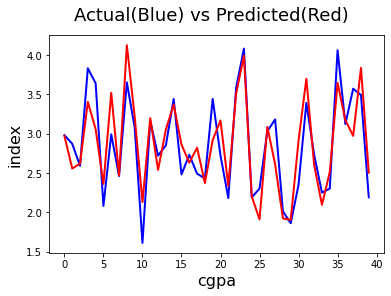

In [14]:
# Actual vs Predicted
fig = plt.figure()
fig.suptitle('Actual(Blue) vs Predicted(Red)', fontsize = 18)
plt.xlabel('cgpa', fontsize = 16)
plt.ylabel('index', fontsize = 16)

plt.plot(y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(y_pred, color="red",  linewidth=2, linestyle="-")

In [15]:
# Testing the model for a student with CGPA = 7.8
predicted_package = LR.predict(7.8)
print("Expected package for a student with CGPA of 7.8:", predicted_package.round(3), "LPA")

Expected package for a student with CGPA of 7.8: 3.466 LPA


## Evaluating the model

In [16]:
# Mean Squared Errors

def calc_MSE(y, y_pred):
    SSE = 0
    
    for i in range(len(y)):
        SSE += (y[i] - y_pred[i])**2
        
    return SSE/len(y)


print(calc_MSE(y_test, y_pred))

0.10221131059334207


In [17]:
# R square

def calc_r_square(y, y_pred):
    SSR = 0
    SST = 0
    y_mean = y.mean()
    
    for i in range(len(y)):
        SSR += (y_mean - y_pred[i])**2
        SST += (y_mean - y[i])**2
    
    return SSR/SST


print(calc_r_square(y_test, y_pred))

0.85892904760346
